# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
# Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)
print("Seaborn version:", sns.__version__)

Pandas version: 2.2.3
Numpy version: 2.1.3
Seaborn version: 0.13.2


In [2]:
iris = pd.read_csv("data/Iris.csv")
iris = iris.drop(columns='Id')
iris

# from sklearn.datasets import load_iris
# iris = load_iris()
# iris = pd.DataFrame(iris.data, columns=iris.feature_names)
# iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [5]:
iris.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


# Data Visulization

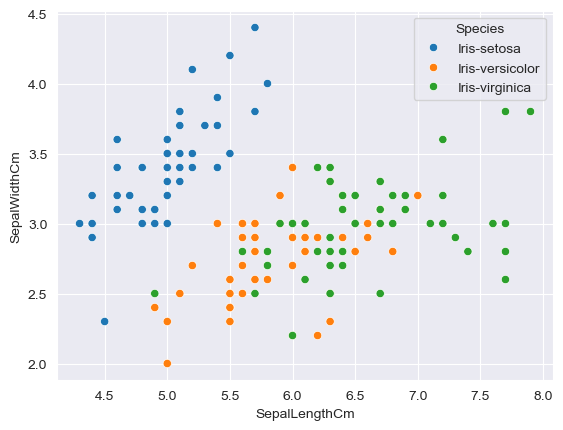

In [6]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm', hue='Species', data=iris)
plt.show()

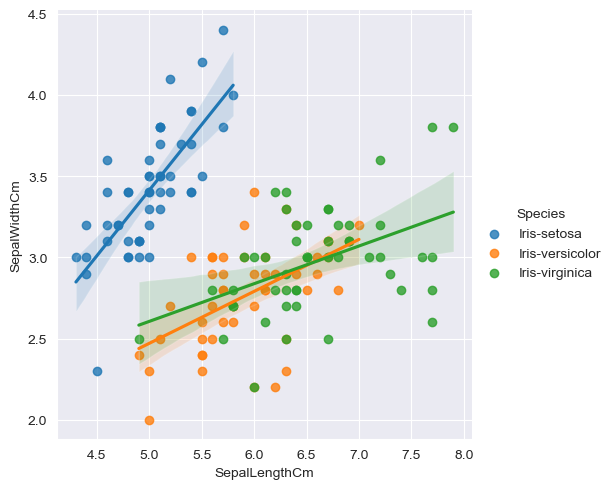

In [7]:
sns.lmplot(x='SepalLengthCm',y='SepalWidthCm', hue='Species', data=iris)

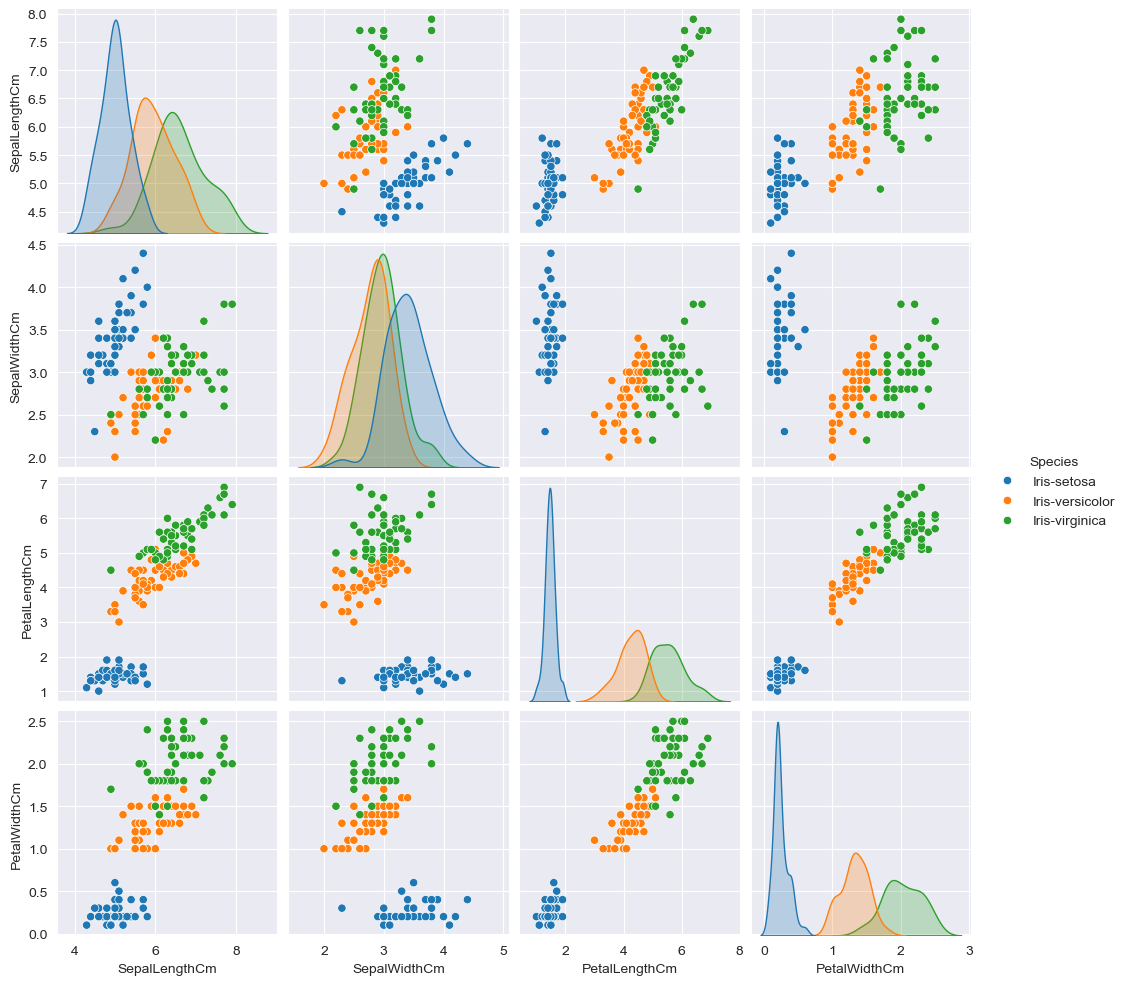

In [8]:
sns.pairplot(iris, hue='Species')

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

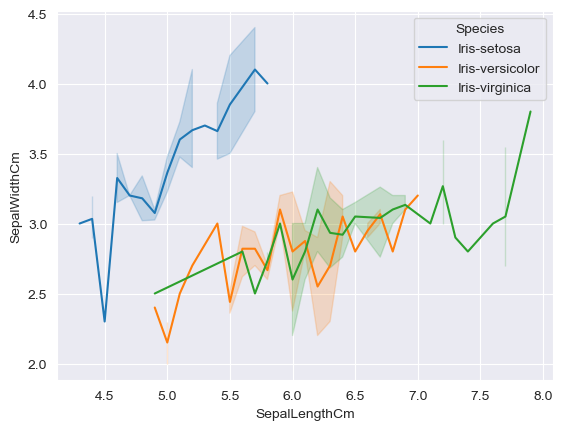

In [9]:
sns.lineplot(x='SepalLengthCm',y='SepalWidthCm', hue='Species', data=iris)

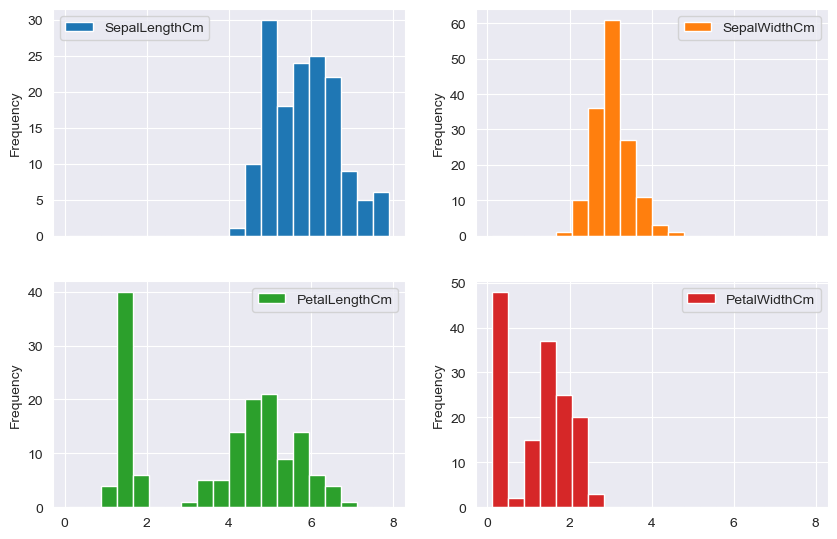

In [10]:
iris.plot.hist(subplots=True, layout=(3,2), figsize=(10,10), bins=20)
plt.show()

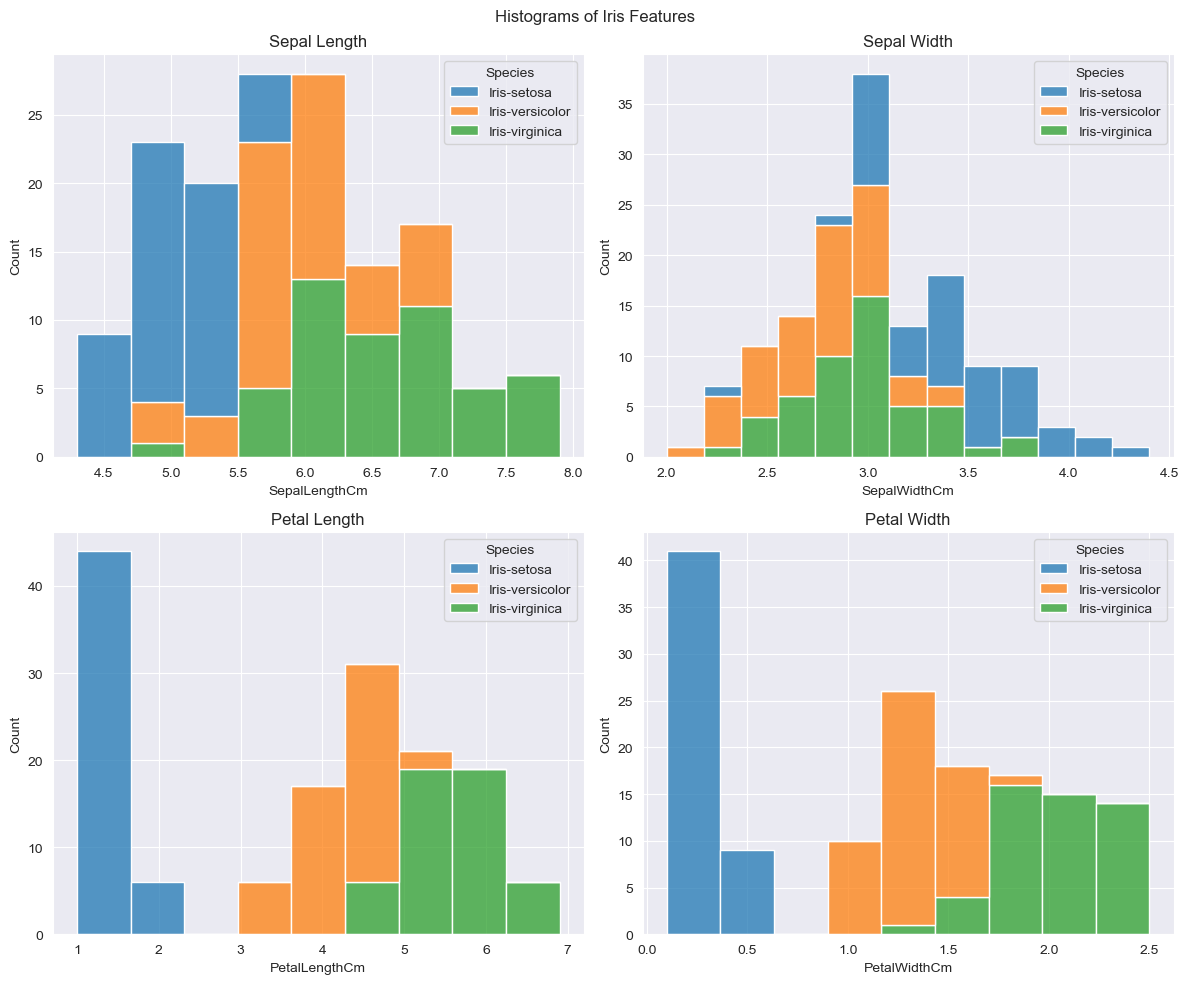

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Histograms of Iris Features')

#Add hue species to each histogram by , hue='Species'
sns.histplot(data=iris, x='SepalLengthCm', hue='Species', ax=axes[0, 0], multiple="stack")
axes[0, 0].set_title('Sepal Length')

sns.histplot(data=iris, x='SepalWidthCm', hue='Species', ax=axes[0, 1], multiple="stack")
axes[0, 1].set_title('Sepal Width')

sns.histplot(data=iris, x='PetalLengthCm', hue='Species', ax=axes[1, 0], multiple="stack")
axes[1, 0].set_title('Petal Length')

sns.histplot(data=iris, x='PetalWidthCm', hue='Species', ax=axes[1, 1], multiple="stack")
axes[1, 1].set_title('Petal Width')

plt.tight_layout()
plt.show()


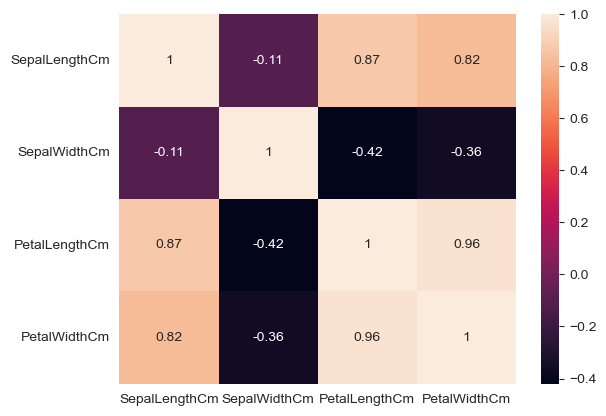

In [12]:
sns.heatmap(iris.drop(columns='Species').corr(), annot=True)
plt.show()

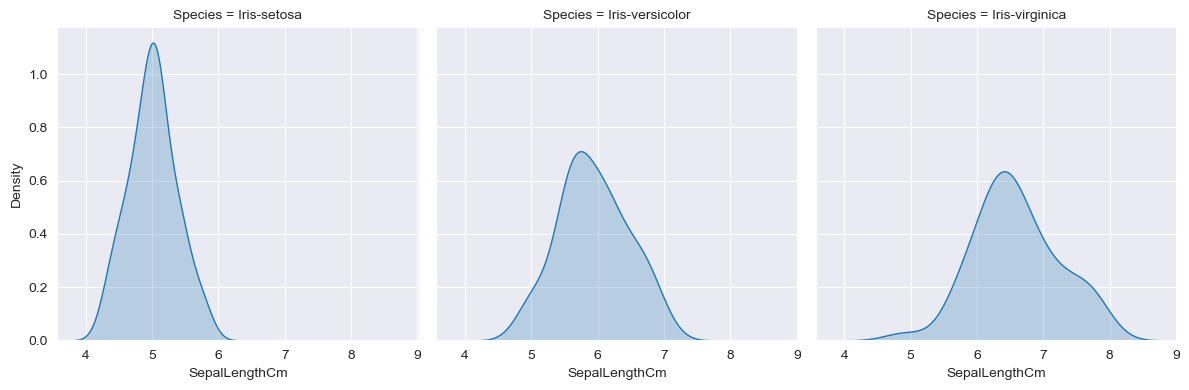

In [13]:
g = sns.FacetGrid(iris, col='Species', height=4)
g = g.map(sns.kdeplot, 'SepalLengthCm', shade=True)

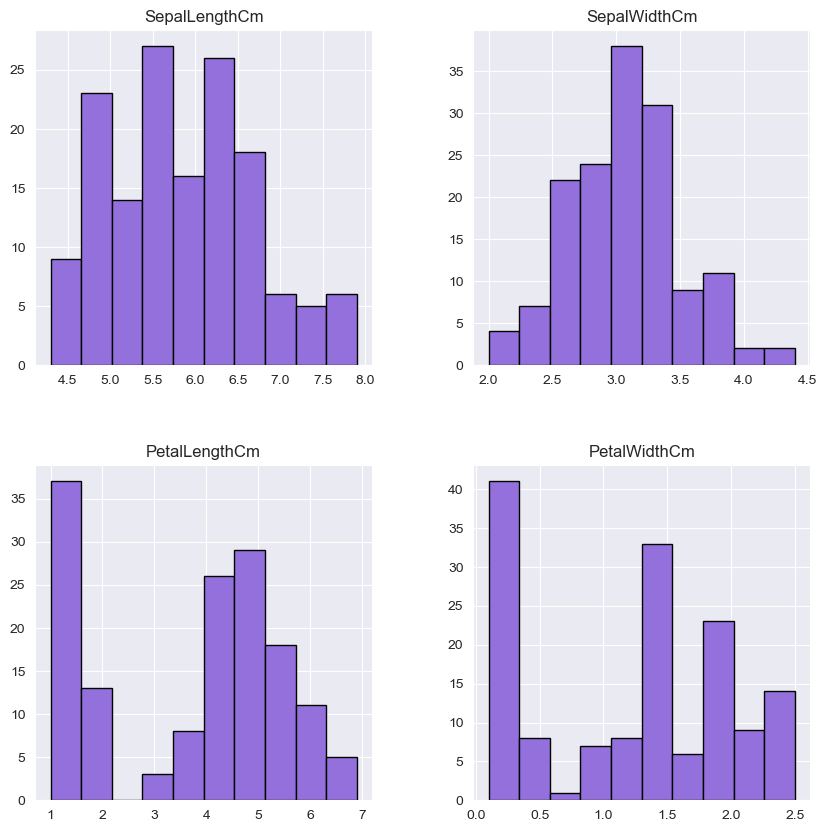

In [14]:
iris.hist(color= 'mediumpurple' ,edgecolor='black',figsize=(10,10))
plt.show()

In [15]:
iris.drop(columns='Species').corr().style.background_gradient(cmap='coolwarm').format(precision=2)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.00,-0.11,0.87,0.82
SepalWidthCm,-0.11,1.00,-0.42,-0.36
PetalLengthCm,0.87,-0.42,1.00,0.96
PetalWidthCm,0.82,-0.36,0.96,1.00


# Machine Learning

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [17]:
X = iris.drop('Species', axis=1)
y = iris.Species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K Neighbors Classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5 , p=2 , metric='minkowski' )
knn.fit(X_train, y_train)

knn.score(X_test, y_test)

1.0

# Logistic Classification

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
logreg.fit(X, y)
# y_pred = logreg.predict(X_test)
y_pred = logreg.predict(X)
# print(metrics.accuracy_score(y_test, y_pred))
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


# SVM

In [20]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=10 , C=1.0)
svm.fit(X_train, y_train)

svm.score(X_test, y_test)

1.0